In [1]:
library(tidyverse)

source('../utils/plottingUtilities.R')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: grid


In [2]:
# original images 
x <- read.csv('../data/clean_x.csv')[, -1]

# Load instabilities

In [3]:
results_dir <- '../scripts/staNMFDicts/'

In [4]:
k1 <- 3
k2 <- 30

In [5]:
stabilities <- c()
for(k in k1:k2){
    stability_file_k <- paste0(results_dir, 'K=', k, '/instability.csv')
    stabilities <- rbind(stabilities, 
                         read.csv(stability_file_k, sep = ',', header = FALSE))
}

colnames(stabilities) <- c('n_pp', 'instability')

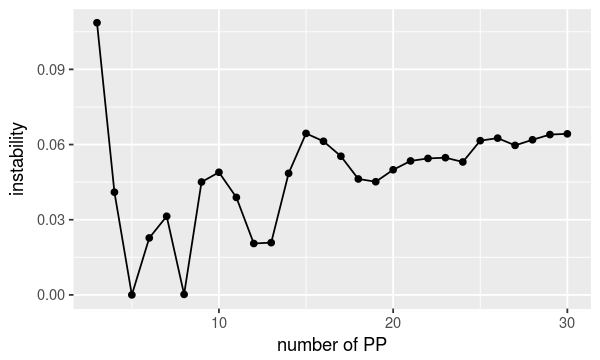

In [6]:
options(repr.plot.width = 5, repr.plot.height = 3)
stabilities %>% 
    ggplot() + geom_point(aes(x = n_pp, y = instability)) + 
                geom_line(aes(x = n_pp, y = instability)) + 
        xlab('number of PP') 

# check out error in fit 

In [7]:
l2_errors <- data.frame(n_pp = c(), error = c())

for(k in k1:k2){
    alpha <- read.csv(paste0(results_dir, '/K=', k, '/alpha_99.csv'))[, -1]
    dict <- read.csv(paste0(results_dir, '/K=', k, '/factorization_99.csv'), header = FALSE)[, -1]

    residual <- x - as.matrix(dict) %*% as.matrix(alpha)
    error <- sum(residual**2)
        
    l2_errors <- rbind(l2_errors, data.frame(n_pp = k, error = error))
}

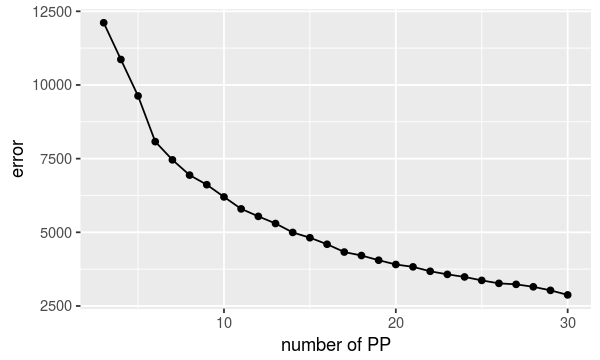

In [8]:
options(repr.plot.width = 5, repr.plot.height = 3)
l2_errors %>% 
    ggplot() + geom_point(aes(x = n_pp, y = error)) + 
                geom_line(aes(x = n_pp, y = error)) + 
        xlab('number of PP') 

# Check out PPs

In [9]:
# need the template
load('../data/lateData.Rdata')

[1] 1 2 3 4 5

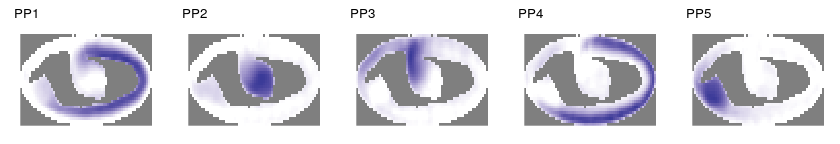

In [10]:
# choose a K
K <- 5

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 1.2)

plot_all_PPs(PPs[, -1], late$x)

[1] 1 2 3 4 5 6 7 8

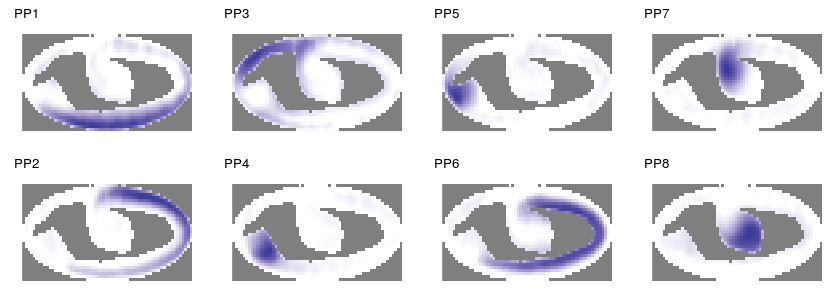

In [11]:
### choose a K
K <- 8

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 2.5)

plot_all_PPs(PPs[, -1], late$x, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

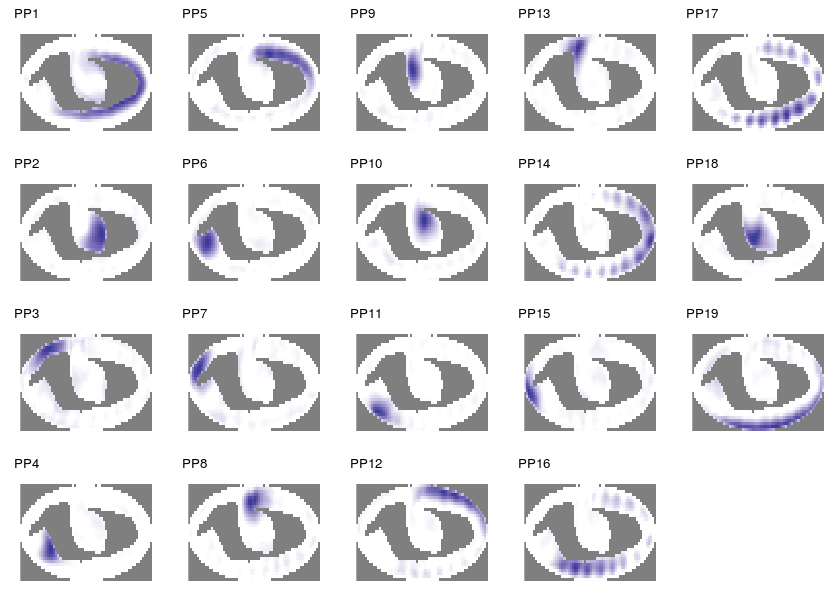

In [25]:
# choose a K
K <- 19

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 5)

plot_all_PPs(PPs[, -1], late$x)

# Pull gene lists

In [13]:
alpha <- read.csv(paste0(results_dir, '/K=', 19, '/alpha_99.csv'))[, -1]

In [14]:
# normalize coefficients 
normalize_vec <- function(x){
    return(x / sum(x))
}

In [15]:
alpha_normalized <- apply(alpha, 2, normalize_vec)

In [16]:
for(i in 1:dim(alpha_normalized)[1]){
    coeffs <- alpha_normalized[i, ]
    
    print(i)
    print(sort(coeffs, decreasing = TRUE)[0:14])
    cat('\n')
    cat('\n')
}

[1] 1
       wgn        bap    CG12744      net.1        tin    eya_2.1     CG6398 
 0.8031747  0.7488772  0.7378811  0.6747080  0.5956260  0.5305933  0.5188534 
     twi_1        net       gukh    meso18E l.3.82Fd_2  CG12744.1       Mef2 
 0.5109050  0.4808245  0.4614536  0.4498809  0.3947865  0.3890261  0.3692699 


[1] 2
Ugt36Bc.2      piwi    CG9925     Chd64   CG32243     Rel.1      Ptx1      aret 
1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.9896223 0.9098981 0.8915790 
   CG7224 Ugt36Bc.1        m2      exex    CG9467    CG9232 
0.7916565 0.7722593 0.7664056 0.7375357 0.6767968 0.6658557 


[1] 3
  eya_1.1       Tkr     eya_1       tll     Tkr.1    CG1829      oc.1        oc 
0.7841219 0.6706941 0.6424579 0.5922274 0.4650574 0.4491371 0.4064042 0.3058177 
 Pros54.1   eya_2.1    CG4194   CG12102       kay     eya_2 
0.2950278 0.2946100 0.2413423 0.2387338 0.2181168 0.2017025 


[1] 4
     Dip.C      su.r.   Tapdelta    su.r..1    CG32423       gcm2        vri 
 1.0000000  

In [17]:
dict_file <- '../scripts/staNMFDicts/K=19/factorization_99.csv'

In [18]:
dict <- read.csv(file = dict_file, header = FALSE)[, -1]

In [19]:
thresh.y <- quantile(dict[, 2], 0.9)

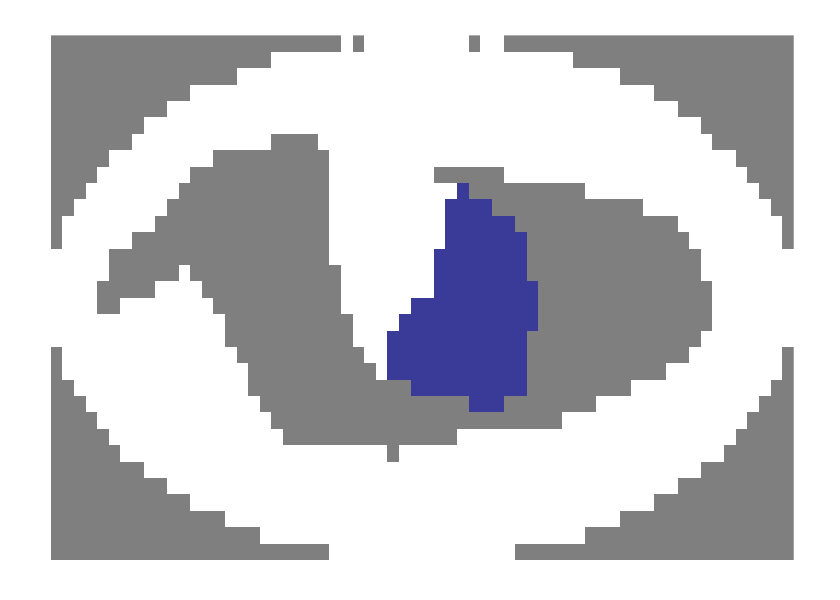

In [20]:
plotImg(dict[, 2] > thresh.y, late$template, FALSE)

In [21]:
load('../data/lateData.Rdata')

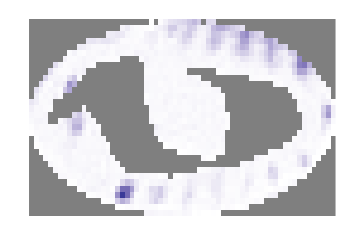

In [75]:
options(repr.plot.width = 3, repr.plot.height = 2)

plotImg(x[, 'ey'], late$template, FALSE)

In [81]:
which(alpha_normalized[, 'ey']>0)

[1] 12

In [78]:
dicts <- PPs[, -1]

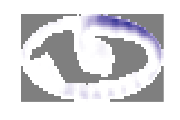

In [82]:
options(repr.plot.width = 1.5, repr.plot.height = 1)

plotImg(dicts[, 12], late$template, FALSE)